In [1]:
import os
os.environ["CUDA_DEVICE_OREDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'
import torch
from torchvision.models import vgg16_bn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
vgg16_bn = vgg16_bn(pretrained=True).to(device)

In [2]:
print(vgg16_bn)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [3]:

feature_output=[]
def error_injection(name,num_error,start_index):
    def hook(model,input):
        start = start_index
        end = start_index + num_error
        #print("error_injection, input_shape:",input[0][0][start:end].size())
        input[0][0][start:end] = 0
        print("shape :",input[0][0].size())
        feature_output.append(input[0][0].cpu())
    return hook

In [4]:

param_list = []
num_error = 128
error_index = 0
for name,parameter in vgg16_bn.named_parameters():
    if "features.34.weight" in name:
        #print(name,"size:",parameter.size())
        param_list.append(parameter)
for name,layer in vgg16_bn.named_modules():
    #print(name)
    if "features.34" in name  and isinstance(layer, torch.nn.modules.conv.Conv2d):
        print(name,layer) # target layer Conv5_1
        handle = layer.register_forward_pre_hook(error_injection(name,num_error,error_index))


features.34 Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [5]:
from PIL import Image
from torchvision import transforms as T
image = Image.open('cat.jpg')
transform = T.Compose([T.Resize((224,224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)
print(X.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
# training
vgg16.to(device)
for epoch in range(max_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs,labels = data
        inputs,labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        y_pred = vgg16_bn(inputs)
        # compute loss 
        loss = criterion(y_pred,labels)
        #print(epoch,i, loss.item())
        
        if not torch.isfinite(loss):
            print("WARNING: non-finite loss, ending training")
            exit(1)
        else :
            running_loss += loss.item()
        loss.backward()
        optimizer.step()
        if i % 30 == 29: 
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/30)) 
            running_loss = 0.0

In [6]:
out = vgg16_bn(X)

shape : torch.Size([512, 14, 14])


In [7]:
import numpy as np
print(feature_output[0][0].size())
#a0 = save_output.outputs[0].cpu().detach().numpy().squeeze()

torch.Size([14, 14])


In [28]:
import torchvision.transforms as transformss
total = torch.tensor(np.zeros((14,14)))
for i,item in enumerate(feature_output[0].squeeze()):
    #print(item.shape)
    if torch.count_nonzero(item) > 10:
        print(i,"th")
        total += item

128 th
129 th
130 th
131 th
132 th
133 th
134 th
135 th
136 th
137 th
138 th
139 th
140 th
141 th
142 th
143 th
144 th
145 th
146 th
147 th
148 th
149 th
150 th
151 th
152 th
153 th
154 th
155 th
156 th
157 th
158 th
159 th
160 th
161 th
162 th
163 th
164 th
165 th
166 th
167 th
168 th
169 th
170 th
171 th
172 th
174 th
175 th
176 th
177 th
178 th
179 th
180 th
181 th
182 th
183 th
184 th
185 th
186 th
187 th
188 th
189 th
190 th
191 th
192 th
193 th
194 th
195 th
196 th
197 th
198 th
199 th
200 th
201 th
202 th
203 th
204 th
205 th
206 th
207 th
208 th
209 th
210 th
211 th
212 th
213 th
214 th
215 th
216 th
217 th
218 th
219 th
221 th
222 th
223 th
224 th
225 th
226 th
227 th
228 th
229 th
230 th
231 th
232 th
233 th
234 th
235 th
236 th
237 th
238 th
239 th
240 th
241 th
242 th
243 th
244 th
245 th
246 th
247 th
248 th
249 th
250 th
251 th
252 th
253 th
254 th
255 th
256 th
257 th
258 th
259 th
260 th
261 th
262 th
263 th
264 th
265 th
266 th
267 th
268 th
269 th
270 th
271 th
272 th

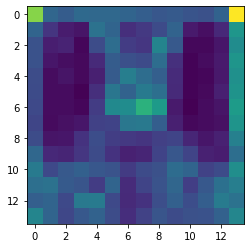

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(total.detach().numpy())

In [22]:
total=None
import gc
gc.collect()

38